In [11]:
import numpy as np
import pandas as pd

#Загрузим отбработанный датасет
processed_data = pd.read_csv('processed_data.csv', index_col='id')
processed_data = processed_data.assign(log_trip_duration=np.log1p(processed_data['trip_duration']))
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,log_trip_duration
id,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,6.122493
id2377394,0,930.399753,0,663.0,1.807119,6.498282
id3858529,1,930.399753,0,2124.0,6.392080,7.661527
id3504673,1,930.399753,0,429.0,1.487155,6.063785
id2181028,1,930.399753,0,435.0,1.189925,6.077642


In [14]:
#И базовый

initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [16]:
#Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [17]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,log_trip_duration,pickup_datetime
id,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,663.0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,2124.0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,429.0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,435.0,1.189925,6.077642,2016-03-26 13:30:55


In [18]:
#datetime datatype cast
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

#Выделим дату, дни недели, часы, месяц у поездок
processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [19]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,663.0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,2124.0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,429.0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,435.0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


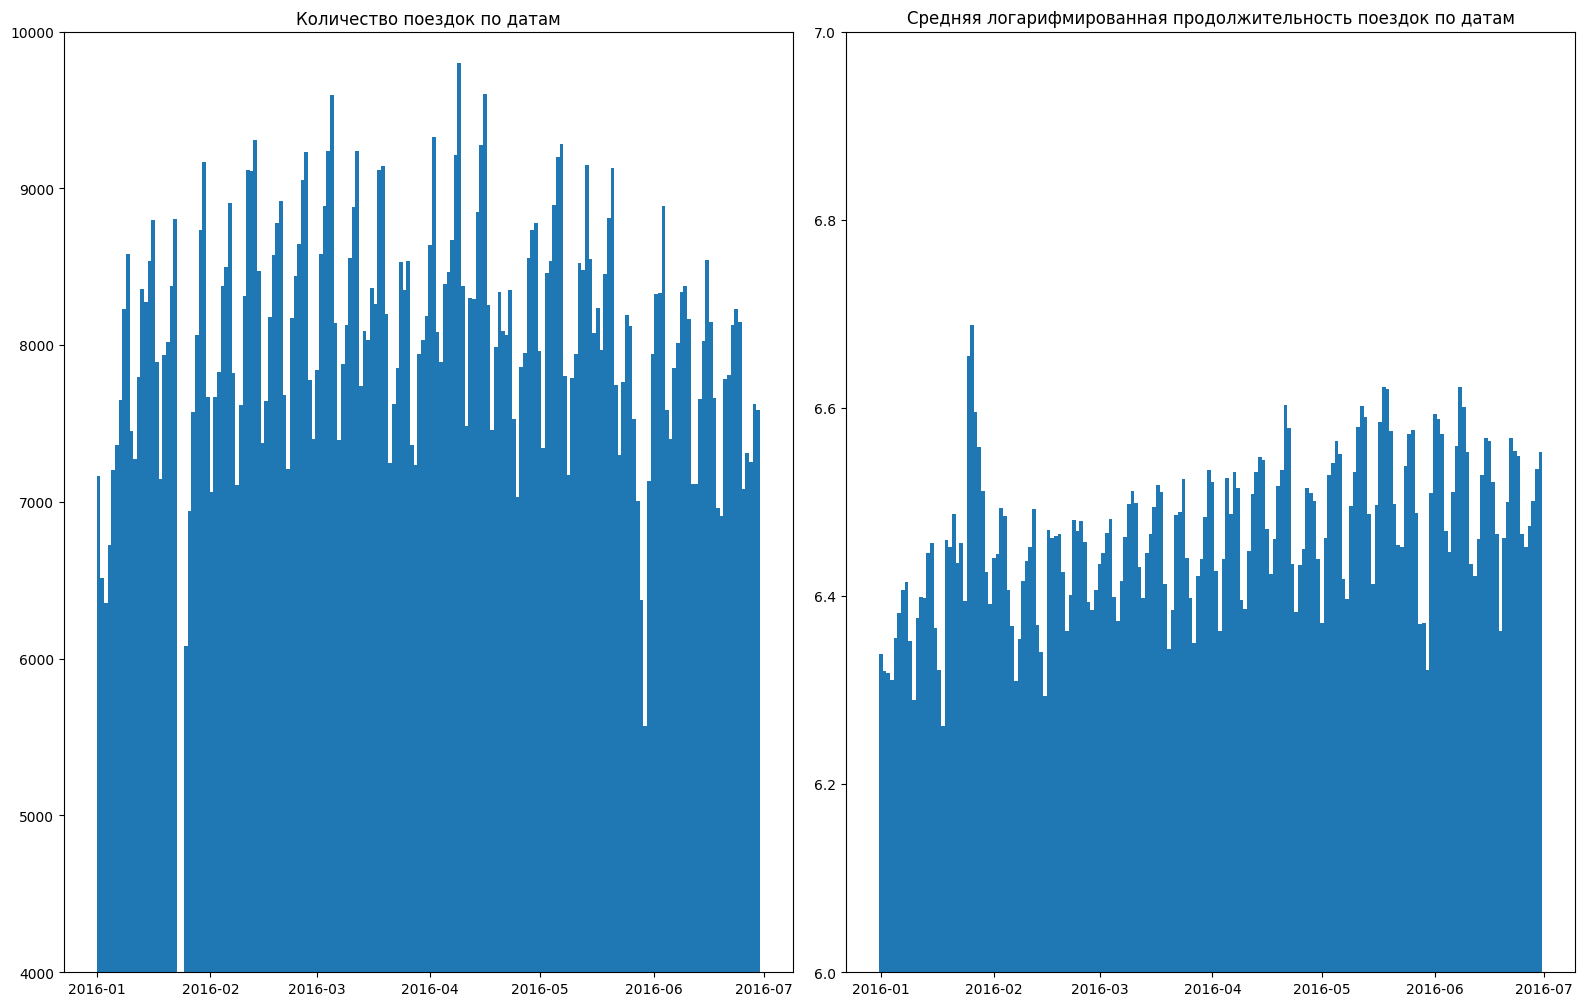

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

In [21]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,663.0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,2124.0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,429.0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,435.0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


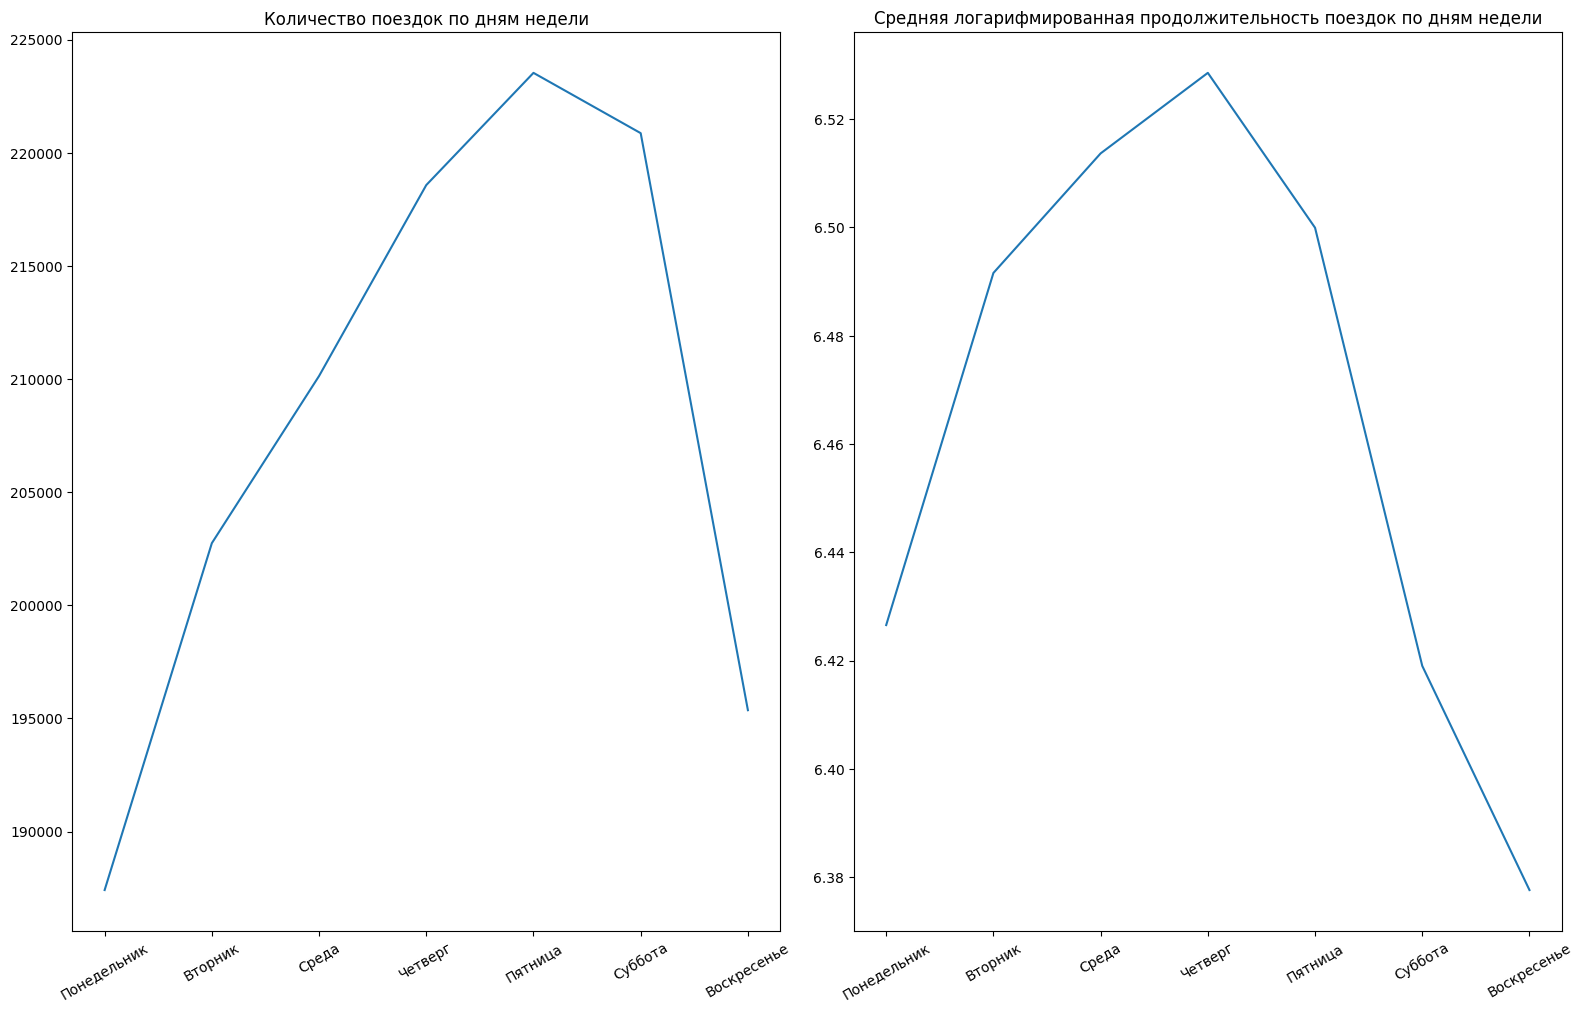

In [25]:
#Построим графики количества поездок
#И Среднего таргета по дням недели

import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.plot(processed_data.groupby(['day_of_week']).size())
plt.xticks(range(7), 
           labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
           rotation=30)
#plt.ylim((145000, 180000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.plot(processed_data.groupby('day_of_week')['log_trip_duration'].mean())
plt.xticks(range(7), 
           labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
           rotation=30)
#plt.ylim((700, 900))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по дням недели')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')

plt.show()

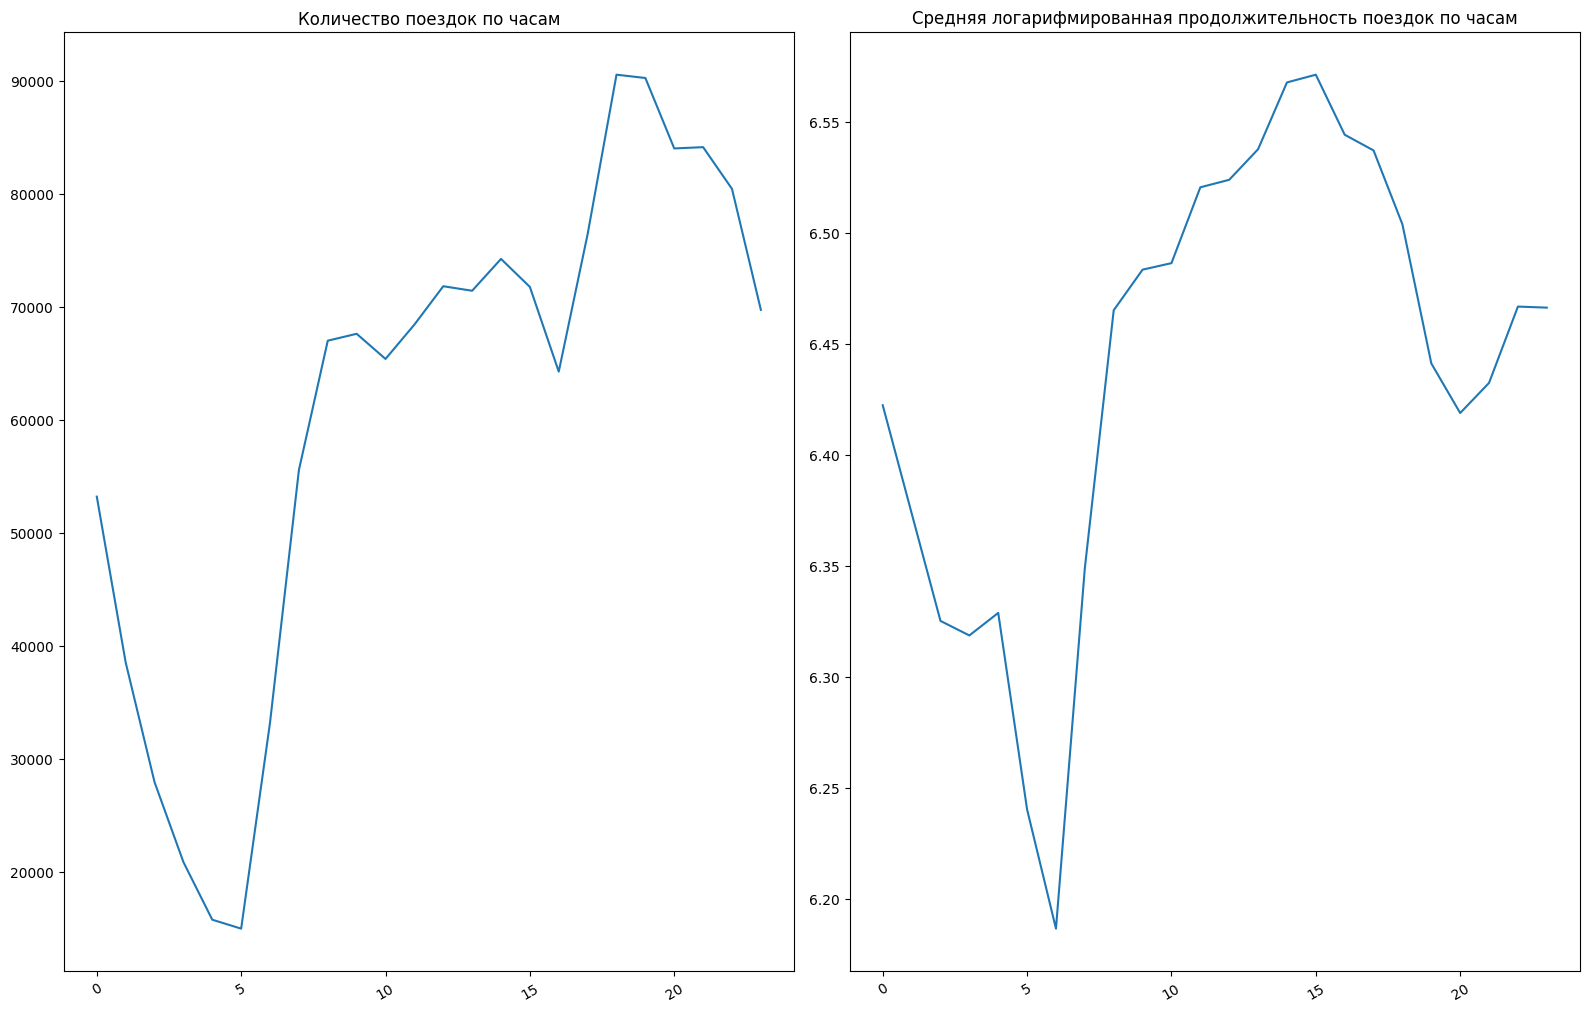

In [26]:
#Построим графики количества поездок
#И Среднего таргета по часам

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.plot(processed_data.groupby(['hour']).size())
plt.xticks(rotation=30)
#plt.ylim((145000, 180000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.plot(processed_data.groupby('hour')['log_trip_duration'].mean())
plt.xticks(rotation=30)
#plt.ylim((700, 900))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по часам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по часам')

plt.show()

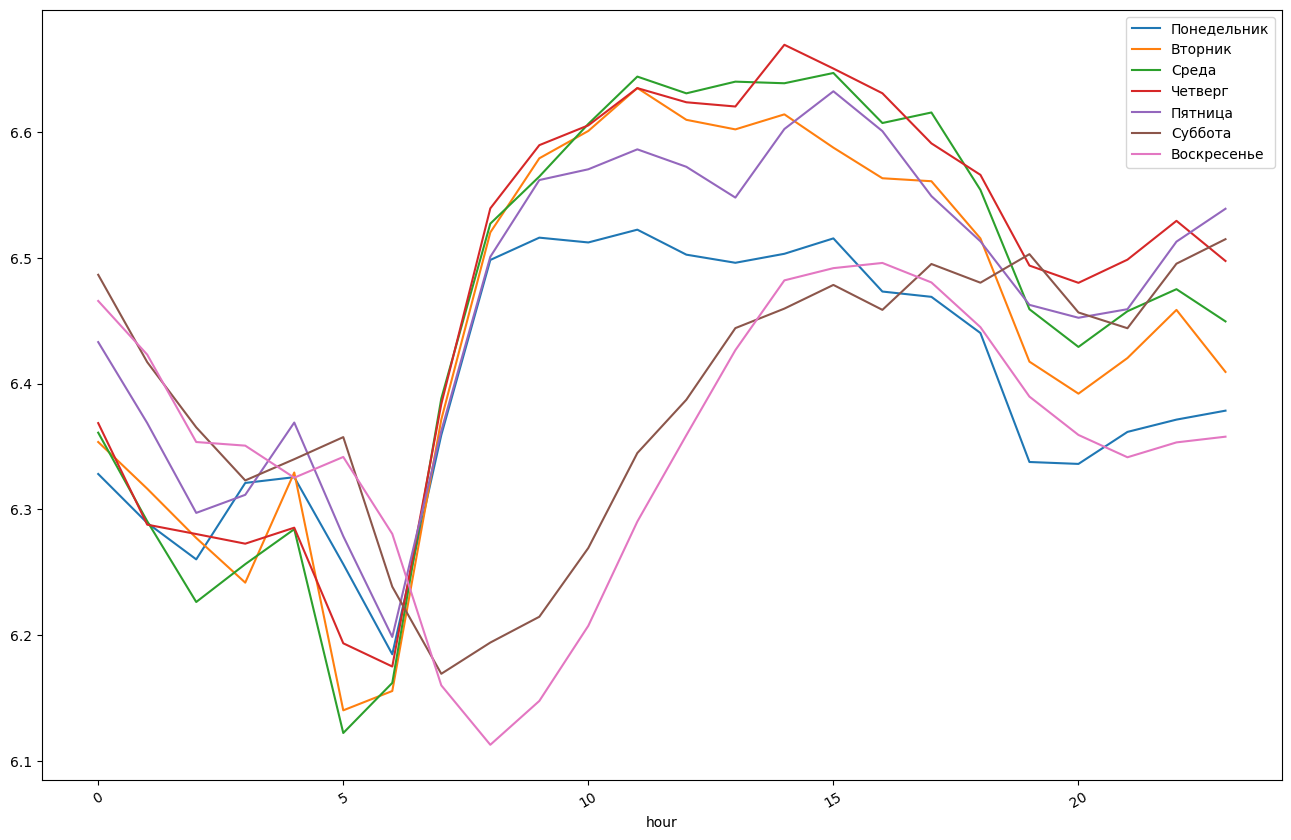

In [27]:
#Построим кривые среднего таргета
#по часам для каждого дня недели

frame = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean()
frame = frame.pivot(index='hour', columns='day_of_week', values='log_trip_duration')
frame.plot(figsize=(16, 10))

plt.xticks(rotation=30)

plt.legend(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

plt.show()

In [28]:
### Изобразим то же самое в виде тепловой карты, чтобы понять загруженность внутри дней недели

frame.columns = ['Понедельник', 'Вторник', 'Среда', 
                 'Четверг', 'Пятница', 'Суббота', 
                 'Воскресенье']

frame.style.background_gradient(cmap='RdPu')

,Понедельник,Вторник,Среда,Четверг,Пятница,Суббота,Воскресенье
hour,,,,,,,
0,6.328173,6.353598,6.361024,6.368642,6.433067,6.486600,6.465794
1,6.289221,6.316450,6.290582,6.287852,6.368686,6.417126,6.423073
2,6.260257,6.277271,6.226347,6.280400,6.297224,6.365256,6.353585
3,6.321038,6.241751,6.256435,6.272725,6.311585,6.323040,6.350705
4,6.325626,6.329338,6.284243,6.285450,6.369078,6.339929,6.325216
5,6.256471,6.140184,6.122148,6.193495,6.278671,6.357487,6.341709
6,6.184772,6.155556,6.162004,6.175040,6.198555,6.238505,6.280519
7,6.359147,6.371453,6.388129,6.383752,6.362452,6.169255,6.160052
8,6.498381,6.520274,6.527269,6.539392,6.500891,6.194081,6.112782


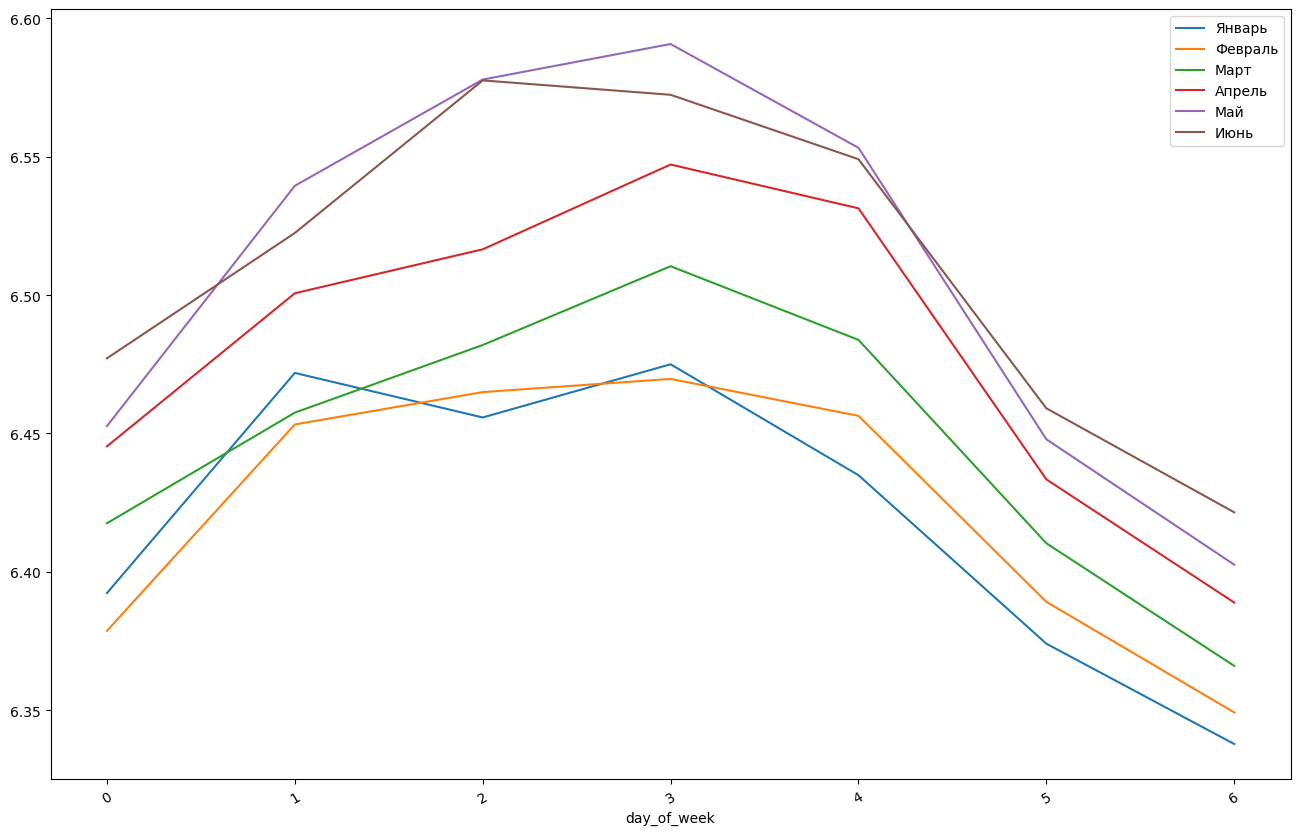

In [29]:
### А теперь для каждого месяца по дням недели

frame_2 = processed_data.groupby(['month', 'day_of_week'], as_index=False)['log_trip_duration'].mean()
frame_2 = frame_2.pivot(index='day_of_week', columns='month', values='log_trip_duration')
frame_2.plot(figsize=(16, 10))

plt.xticks(rotation=30)

plt.legend(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь'])

plt.show()

In [33]:
### Создадим первый бинарный признак (Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне))

processed_data['anomaly'] = 0
processed_data.loc[processed_data.date.apply(str)=='2016-01-23', 'anomaly'] = 1

In [34]:
### Создадим второй бинарный признак (Является ли время поездки статистически самым проблемным, то есть час пиком?)

frame = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean()
frame = frame.pivot(index='hour', columns='day_of_week', values='log_trip_duration')

processed_data['traffic_jam'] = 0

for x in frame.unstack().sort_values(ascending=False).index[:10]:

    processed_data.loc[(processed_data.day_of_week==x[0])&(processed_data.hour==x[1]), 'traffic_jam'] = 1


In [35]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,663.0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,2124.0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,429.0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,435.0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


In [ ]:
#equivalent to traffic_jam column
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [ ]:
processed_data.head()

In [39]:
#one-hot remaining columns
for col in ['day_of_week', 'hour', 'month']:
    onehot = pd.get_dummies(processed_data[col], drop_first=True)
    onehot.columns = [f"{col}_{x}" for x in onehot.columns]
    
    processed_data = pd.concat((processed_data, onehot), axis=1)
    processed_data = processed_data.drop(col, axis=1)

In [41]:
processed_data[['passenger_count', 'distance_km']].corr()

,passenger_count,distance_km
passenger_count,1.000000,0.016596
distance_km,0.016596,1.000000


In [42]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,6.122493,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
id2377394,0,930.399753,0,663.0,1.807119,6.498282,0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
id3858529,1,930.399753,0,2124.0,6.392080,7.661527,0,1,True,False,...,False,False,False,False,False,False,False,False,False,False
id3504673,1,930.399753,0,429.0,1.487155,6.063785,0,0,False,True,...,True,False,False,False,False,False,False,True,False,False
id2181028,1,930.399753,0,435.0,1.189925,6.077642,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


In [43]:
#На данный момент у нас 41 фича
#Представим, что хочется сократить их количество до 5.
#Воспользуемся для этим каким-нибудь методом обертки, например, методом прямого отбора

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)

x = processed_data.drop('log_trip_duration', axis=1)
y = processed_data['log_trip_duration']

sfs.fit(x, y)

,estimator,LinearRegression()
,n_features_to_select,5
,tol,None
,direction,'forward'
,scoring,None
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [44]:
#Перечислите фичи, которые окажутся наиболее желанными

sfs.get_feature_names_out()

array(['trip_duration', 'distance_km', 'traffic_jam', 'hour_5', 'hour_6'],
      dtype=object)

In [45]:
#Замерим качество линейной регрессии на данных фичах. Результат немного лучше, чем при применении CV

model_check = LinearRegression()
model_check.fit(x[sfs.get_feature_names_out()], y)

preds = model_check.predict(x[sfs.get_feature_names_out()])

np.mean((preds-y)**2)

0.39234428361646173